In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Iris.csv')

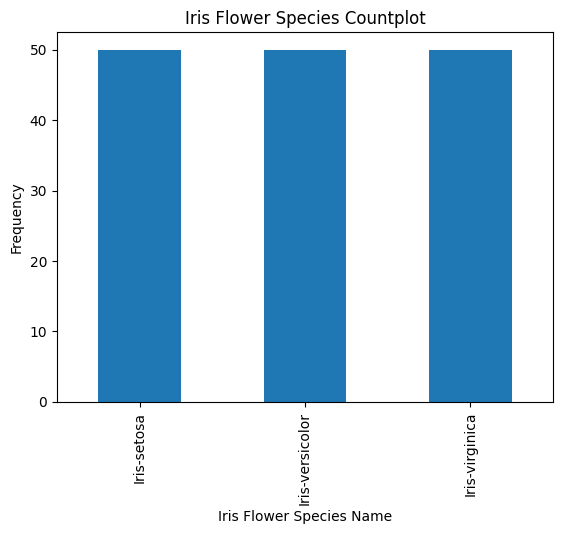

In [7]:
plt.title('Iris Flower Species Countplot')
df['Species'].value_counts().plot(kind='bar')
plt.xlabel('Iris Flower Species Name')
plt.ylabel('Frequency')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


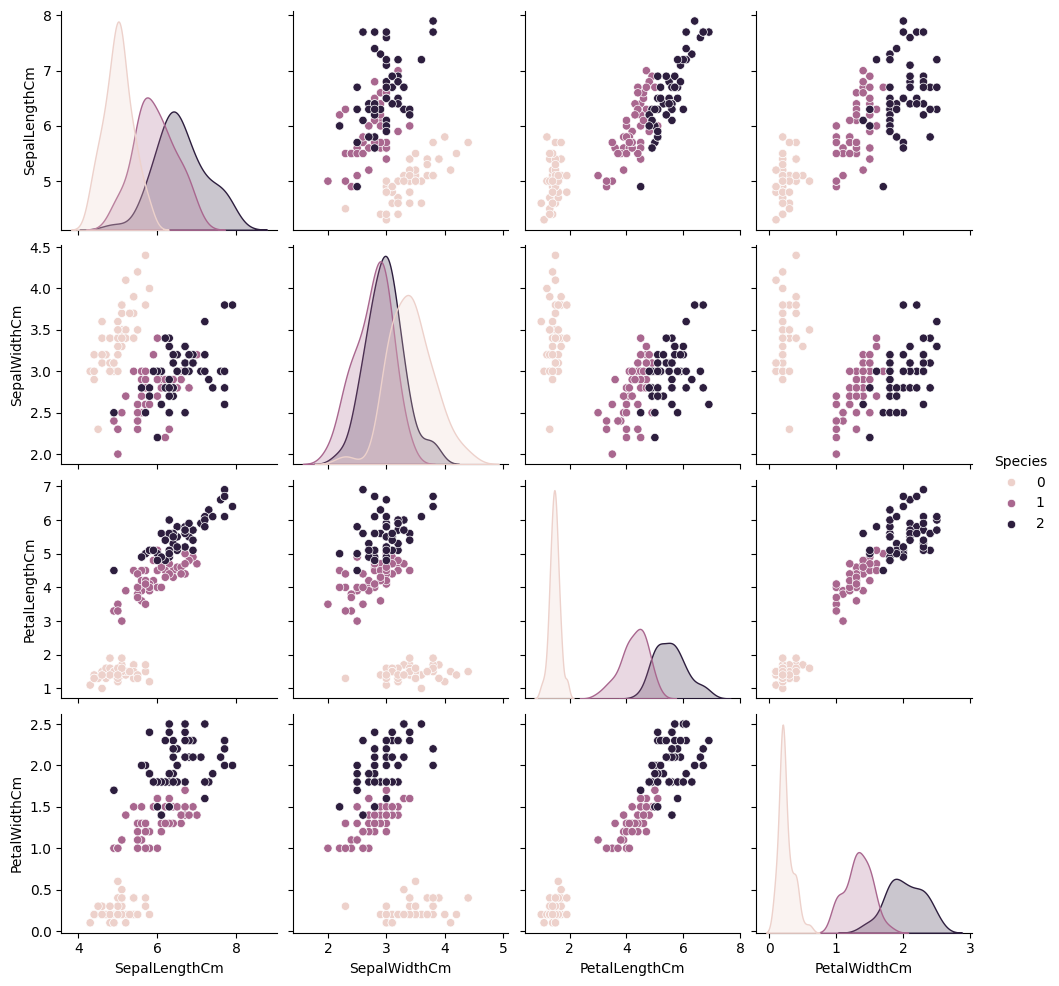

SepalLengthCm
Total Sum: 876.5000000000002
Total Count: 150
Min Value: 4.3
Max Value: 7.9
Range: 3.6000000000000005
Average: 5.843333333333334
Median: 5.8
Mode: ModeResult(mode=np.float64(5.0), count=np.int64(10))
Quartile 1: 5.1
Quartile 3: 6.4
Inter Quartile Range: 1.3000000000000007
Lower Whisker: 3.1499999999999986
Upper Whisker: 8.350000000000001
Variance: 0.6811222222222223
Standard Deviation: 0.8253012917851409
--------------------------------------------------
SepalWidthCm
Total Sum: 458.10000000000014
Total Count: 150
Min Value: 2.0
Max Value: 4.4
Range: 2.4000000000000004
Average: 3.0540000000000003
Median: 3.0
Mode: ModeResult(mode=np.float64(3.0), count=np.int64(26))
Quartile 1: 2.8
Quartile 3: 3.3
Inter Quartile Range: 0.5
Lower Whisker: 2.05
Upper Whisker: 4.05
Variance: 0.18675066666666668
Standard Deviation: 0.4321465800705435
--------------------------------------------------
PetalLengthCm
Total Sum: 563.8000000000004
Total Count: 150
Min Value: 1.0
Max Value: 6.9
Rang

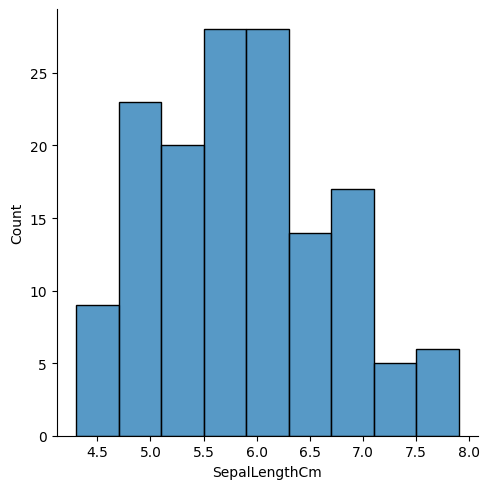

SepalWidthCm


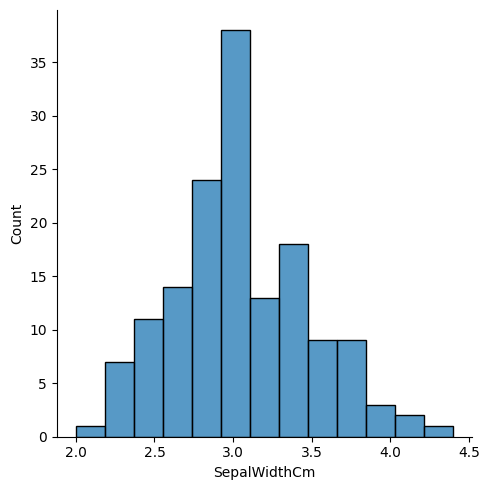

PetalLengthCm


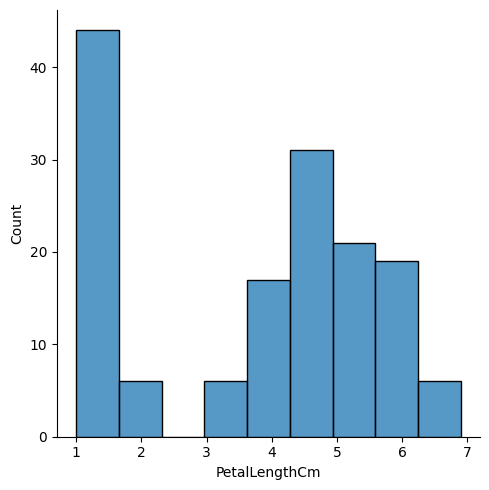

PetalWidthCm


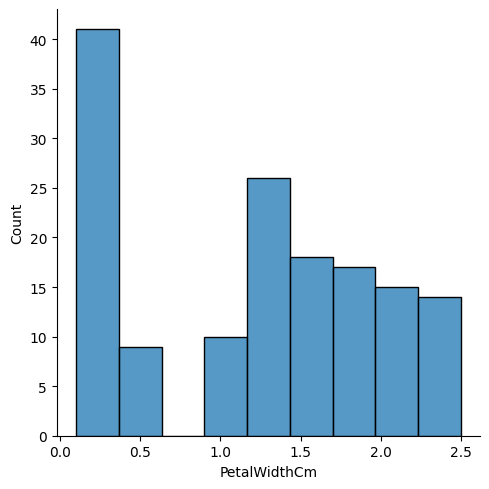

Species


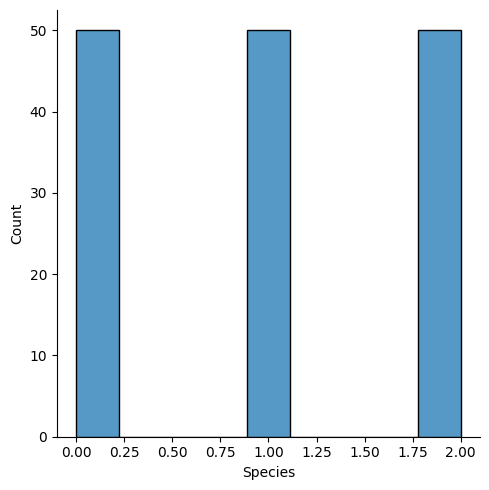

SepalLengthCm


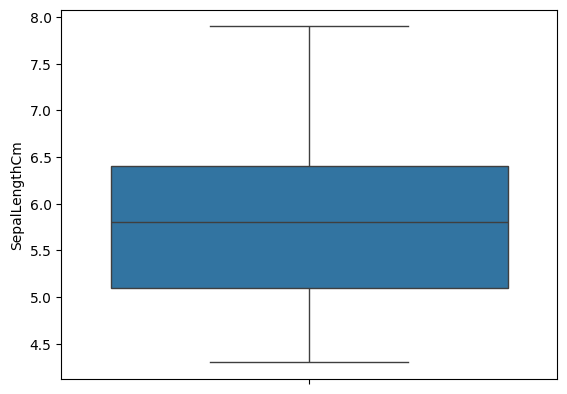

SepalWidthCm


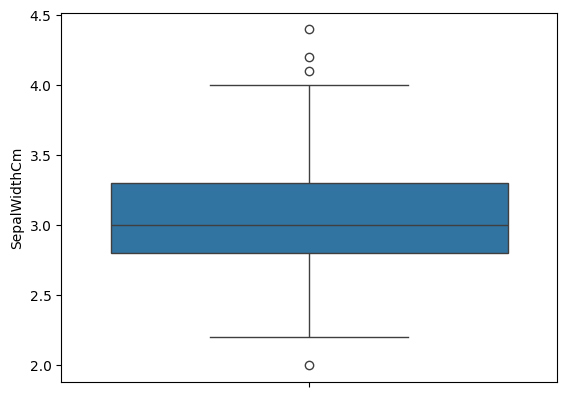

PetalLengthCm


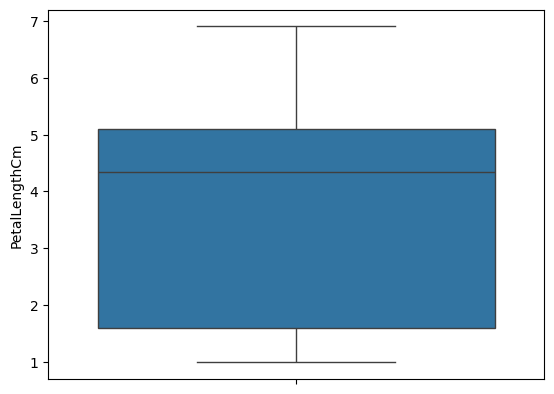

PetalWidthCm


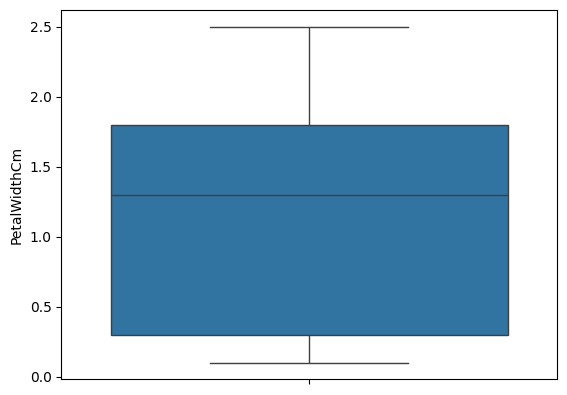

Species


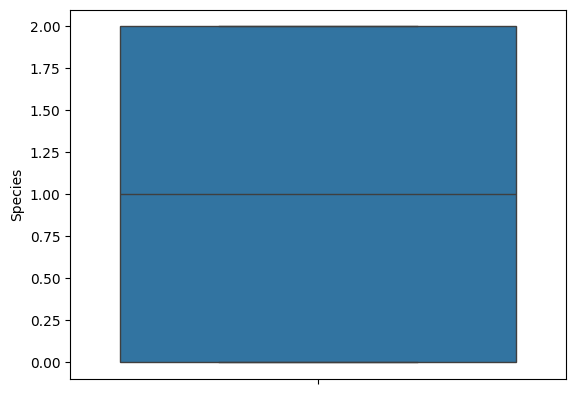

In [8]:
df.info()
df.describe()
df.isnull().sum()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
sns.pairplot(df,hue='Species',)
plt.show()

import Om_stats
for col_name in df.columns:
    print(col_name)
    Om_stats.cal_stats(df[col_name])
    print('-'*50)

for col_name in df.columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

for col_name in df.columns:
    print(col_name)
    sns.boxplot(df[col_name])
    plt.show()

X=df.drop('Species',axis=1)
y=df['Species']

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1001)

In [9]:
#DEEP LEARNING
#STEP 1--> BUILD MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model=Sequential()
#sigmoid (0 to 1)
#relu (0 to max)
model.add(Dense(64,input_dim=4,activation='relu')) #input layer
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu')) #hidden layer 1
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu')) #hidden layer 2
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu')) #hidden layer 3
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax')) #output layer [0.2 0.2 0.6]
#OUTPUT LAYER 
#binary --> activation = 'sigmoid'
#categorical--> activation = 'softmax'
#regression --> no activation function

#STEP 2--> COMPILE MODEL
#LOSS
#categorial --> sparse_categorical_crossentropy
#binary --> binary_crossentropy
#regression --> mse
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
#STEP 3--> RUN THE MODEL
model.fit(X_train,y_train,validation_split=0.2,epochs=1000, verbose=1,callbacks=[early_stop])

y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.2188 - loss: 1.1263 - val_accuracy: 0.4167 - val_loss: 1.1142
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2982 - loss: 1.1080 - val_accuracy: 0.4167 - val_loss: 1.1037
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2500 - loss: 1.1031 - val_accuracy: 0.5833 - val_loss: 1.0921
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3984 - loss: 1.0820 - val_accuracy: 0.6250 - val_loss: 1.0801
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4583 - loss: 1.0800 - val_accuracy: 0.7083 - val_loss: 1.0693
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5065 - loss: 1.0574 - val_accuracy: 0.7083 - val_loss: 1.0579
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5417 - loss: 1.0501 - val_accuracy: 0.7083 - val_loss: 1.0456
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5638 - loss: 1.0321 - val_accuracy: 0.7500 - 